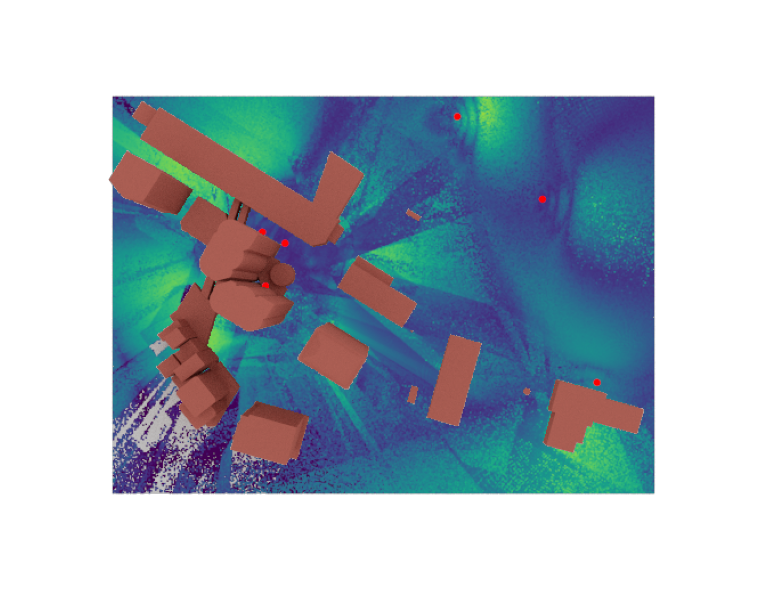

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sionna.rt as rt

# 设置为False以在Jupyter中使用预览（显示无线电地图）
no_preview = True  # 重要：改为False（不是True）

def config_scene(num_rows, num_cols):
    """Load and configure a scene (NO RADIO MAP COMPUTATION HERE)"""
    scene = rt.load_scene("Hongkong.xml")
    scene.bandwidth = 100e6

    scene.tx_array = rt.PlanarArray(
        num_rows=num_rows,
        num_cols=num_cols,
        pattern="tr38901",
        polarization="V"
    )

    scene.rx_array = rt.PlanarArray(
        num_rows=1,
        num_cols=1,
        pattern="iso",
        polarization="V"
    )

    positions = np.array(
        [[-150.3, 21.63, 42.5],
         [-125.1, 9.58, 42.5],
         [-104.5, 54.94, 42.5],
         [-128.6, 66.73, 42.5],
         [172.1, 103.7, 24],
         [232.8, -95.5, 17],
         [80.1, 193.8, 21]]
    )
    look_ats = np.array(
        [[-216, -21, 0],
         [-90, -80, 0],
         [-16.5, 75.8, 0],
         [-164, 153.7, 0],
         [247, 92, 0],
         [211, -180, 0],
         [126.3, 194.7, 0]]
    )
    power_dbms = [23] * 7

    for i, position in enumerate(positions):
        scene.add(rt.Transmitter(
            name=f'tx{i}',
            position=position,
            look_at=look_ats[i],
            power_dbm=power_dbms[i]
        ))

    return scene

num_rows = 8
num_cols = 2
scene_etoile = config_scene(num_rows, num_cols)

rm_solver = rt.RadioMapSolver()
rm_etoile = rm_solver(
    scene_etoile,
    max_depth=5,
    samples_per_tx=10 ** 7,
    cell_size=(1, 1)
)

if no_preview:
    cam = rt.Camera(
        position=[0, 0, 1000],
        orientation=np.array([0, np.pi / 2, -np.pi / 2])
    )
    scene_etoile.render(
        camera=cam,
        radio_map=rm_etoile,
        rm_metric="sinr",
        rm_vmin=-10,
        rm_vmax=60,
    )
else:
    # 关键：在Jupyter中，这个preview()会显示无线电地图
    scene_etoile.preview(
        radio_map=rm_etoile,
        rm_metric="sinr",
        rm_vmin=-10,
        rm_vmax=60
    )